In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# 中文适配
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


def plot_scalar_field(scalar_function, x_range=(-5, 5), y_range=(-5, 5), resolution=100,
                      cmap='viridis', title='标量场可视化 (Scalar Field Visualization)',
                      alpha=0.8, figsize=(10, 8)):
    """
    在三维空间中绘制标量场可视化。

    参数:
        scalar_function: 函数，接收x和y坐标并返回标量值
        x_range: tuple, x轴的范围，默认为(-5, 5)
        y_range: tuple, y轴的范围，默认为(-5, 5)
        resolution: int, 网格分辨率，默认为100
        cmap: str, 颜色映射，默认为'viridis'
        title: str, 图表标题
        alpha: float, 表面透明度，0到1之间
        figsize: tuple, 图形大小

    返回:
        fig, ax: matplotlib的图形和轴对象
    """
    # 创建网格
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)

    # 计算标量场的值
    Z = np.zeros_like(X)
    for i in range(resolution):
        for j in range(resolution):
            Z[i, j] = scalar_function(X[i, j], Y[i, j])

    # 创建3D图形
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')

    # 绘制表面
    surf = ax.plot_surface(X, Y, Z, cmap=cmap, alpha=alpha,
                           antialiased=True, edgecolor='none')

    # 添加颜色条
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='标量值 (Scalar Value)')

    # 设置标签
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('标量值 (Scalar Value)')
    ax.set_title(title)

    # 自动调整视角
    ax.view_init(elev=30, azim=45)

    plt.tight_layout()
    return fig, ax


(<Figure size 1000x800 with 2 Axes>,
 <Axes3D: title={'center': '标量场可视化 (Scalar Field Visualization)'}, xlabel='X', ylabel='Y', zlabel='标量值 (Scalar Value)'>)

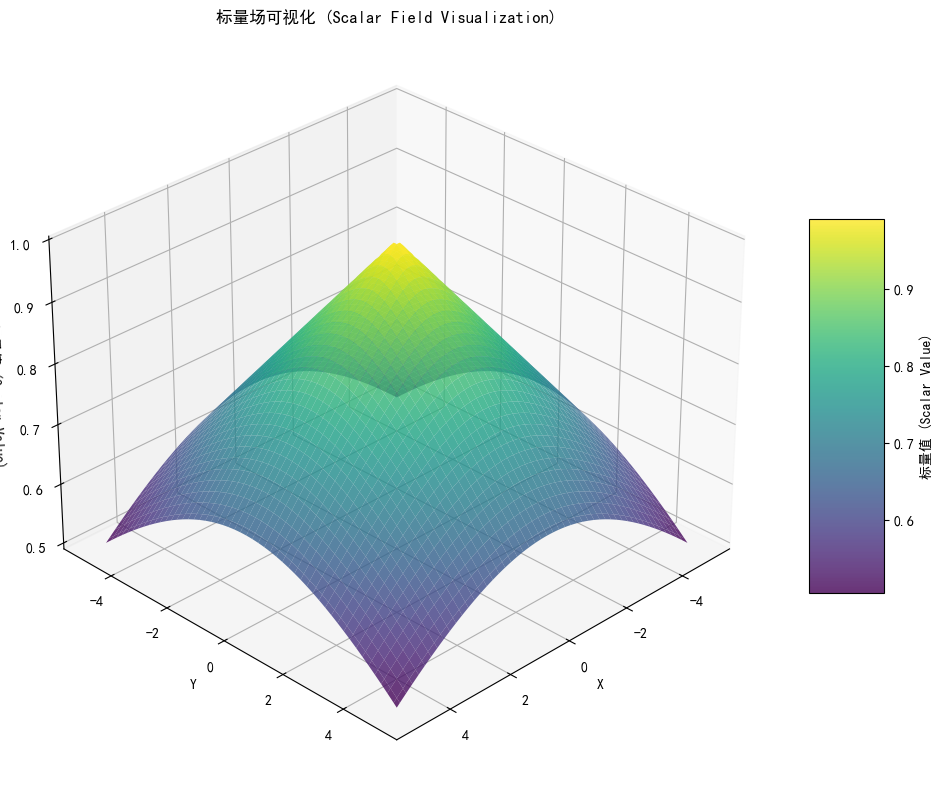

In [43]:
def u(x, y):
    distance = np.sqrt(x ** 2 + y ** 2)
    max_possible_distance = np.sqrt(10 ** 2 + 10 ** 2)
    normalized_distance = 1 - (distance / max_possible_distance)
    return normalized_distance


plot_scalar_field(u, x_range=(-5, 5), y_range=(-5, 5))